<a href="https://colab.research.google.com/github/vaishnavi4445/svm_moons_classification/blob/main/svm_moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

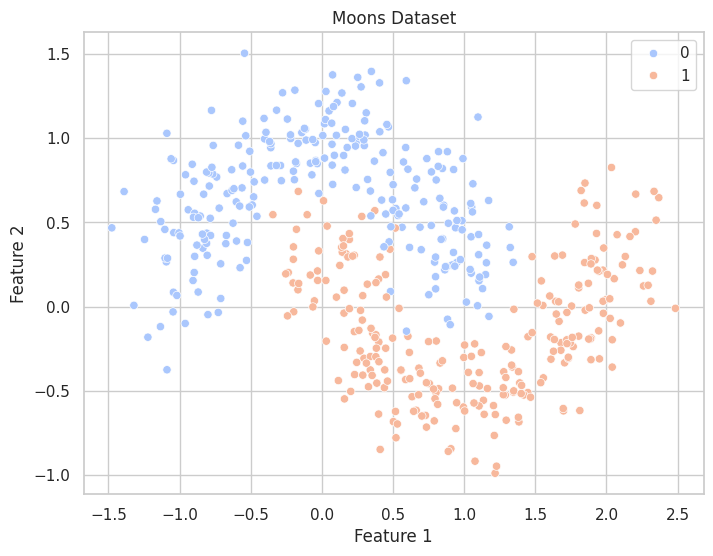

🔹 Linear SVM Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        75
           1       0.89      0.84      0.86        75

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150

🔸 RBF SVM Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.96      0.98        75

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

✅ Best Parameters: {'C': 1, 'gamma': 'scale'}
📊 Best Cross-Validation Score: 0.9714285714285715


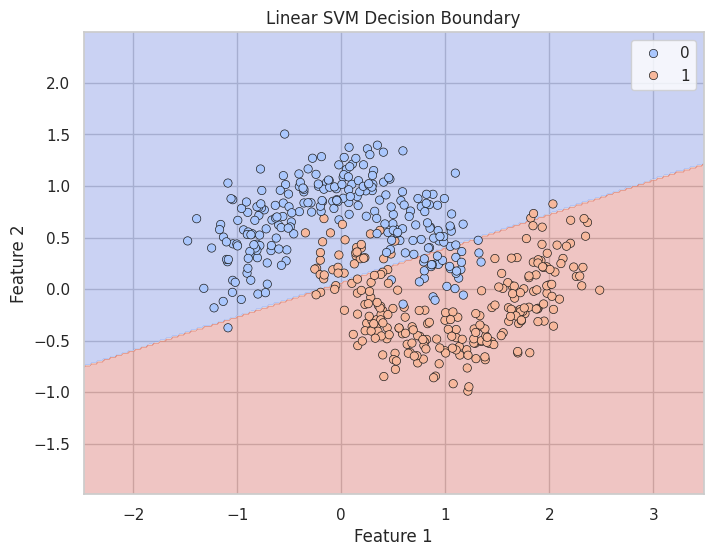

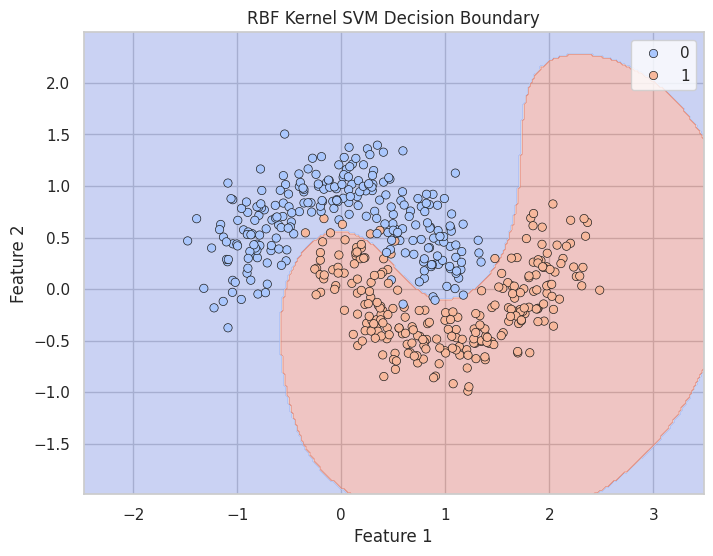

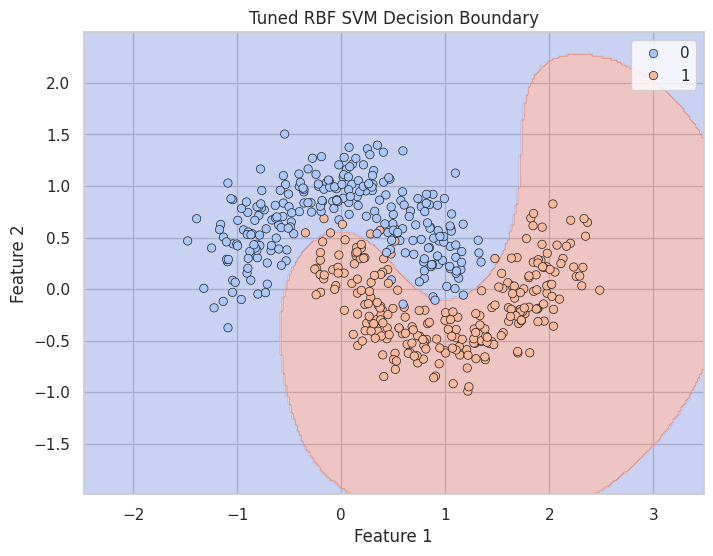

In [2]:
# 🧠 SVM Classification on Moons Dataset

# 📦 Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 🎨 Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

# 📊 1. Generate the dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# 🔍 Visualize the dataset
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm")
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# ✂️ 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📈 3. Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("🔹 Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# 🌌 4. RBF Kernel SVM
rbf_svm = SVC(kernel='rbf', gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("🔸 RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# 🧪 5. Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)
print("📊 Best Cross-Validation Score:", grid.best_score_)

# 🧭 6. Decision Boundary Plot Function
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="k")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 📉 7. Plot decision boundaries
plot_decision_boundary(linear_svm, X, y, "Linear SVM Decision Boundary")
plot_decision_boundary(rbf_svm, X, y, "RBF Kernel SVM Decision Boundary")
plot_decision_boundary(grid.best_estimator_, X, y, "Tuned RBF SVM Decision Boundary")